In [1543]:
import pandas as pd
import seaborn as sns 
import numpy as np


In [1544]:
data = pd.read_csv('cars2021.csv')

In [1545]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13316 entries, 0 to 13315
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Stanje:       13316 non-null  object
 1   Marka         13316 non-null  object
 2   Model         13316 non-null  object
 3   Godište       13316 non-null  int64 
 4   Kilometraža   13316 non-null  object
 5   Karoserija    13316 non-null  object
 6   Gorivo        13316 non-null  object
 7   Kubikaža      13316 non-null  object
 8   Snaga motora  13316 non-null  object
 9   Fiksna cena   13316 non-null  object
 10  Zamena:       13316 non-null  object
 11  Broj oglasa:  13316 non-null  int64 
 12  Cena          13316 non-null  object
dtypes: int64(2), object(11)
memory usage: 1.3+ MB


In [1546]:
data.columns

Index(['Stanje:', 'Marka', 'Model', 'Godište', 'Kilometraža', 'Karoserija',
       'Gorivo', 'Kubikaža', 'Snaga motora', 'Fiksna cena', 'Zamena:',
       'Broj oglasa:', 'Cena'],
      dtype='object')

In [1547]:
data.drop(columns=['Stanje:','Fiksna cena', 'Zamena:', 'Broj oglasa:'], inplace=True)

In [1548]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13316 entries, 0 to 13315
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Marka         13316 non-null  object
 1   Model         13316 non-null  object
 2   Godište       13316 non-null  int64 
 3   Kilometraža   13316 non-null  object
 4   Karoserija    13316 non-null  object
 5   Gorivo        13316 non-null  object
 6   Kubikaža      13316 non-null  object
 7   Snaga motora  13316 non-null  object
 8   Cena          13316 non-null  object
dtypes: int64(1), object(8)
memory usage: 936.4+ KB


In [1549]:
data.columns

Index(['Marka', 'Model', 'Godište', 'Kilometraža', 'Karoserija', 'Gorivo',
       'Kubikaža', 'Snaga motora', 'Cena'],
      dtype='object')

In [1550]:
data.rename(columns={'Godište': 'Godiste', 'Kilometraža': 'Kilometraza', 'Kubikaža': 'Kubikaza', 'Snaga motora': 'Snaga'}, inplace=True)

In [1551]:
data

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena
0,Alfa Romeo,75,1989,27.000 km,Limuzina,Benzin,1963 cm3,109/148 (kW/KS),1.5
1,Alfa Romeo,145,1996,188.754 km,Hečbek,Benzin,2400 cm3,184/250 (kW/KS),1.4
2,Alfa Romeo,145,1997,227.069 km,Hečbek,Benzin,1596 cm3,76/103 (kW/KS),750
3,Alfa Romeo,146,1998,170.000 km,Hečbek,Benzin + Gas (TNG),1598 cm3,88/120 (kW/KS),300
4,Alfa Romeo,146,1999,250.000 km,Limuzina,Benzin + Gas (TNG),1400 cm3,76/103 (kW/KS),700
...,...,...,...,...,...,...,...,...,...
13311,Škoda,Yeti,2009,135.950 km,Džip/SUV,Benzin,1796 cm3,118/160 (kW/KS),6.499
13312,Škoda,Yeti,2012,141.000 km,Džip/SUV,Dizel,1968 cm3,81/110 (kW/KS),8.5
13313,Škoda,Yeti,2014,216.000 km,Džip/SUV,Dizel,1968 cm3,81/110 (kW/KS),8.5
13314,Škoda,Yeti,2011,289.000 km,Džip/SUV,Dizel,1968 cm3,81/110 (kW/KS),6.3


In [1552]:
data['Kilometraza'] = data['Kilometraza'].apply(lambda x: int(x.split(' ')[0].replace('.','')))

In [1553]:
data['Kilometraza']

0         27000
1        188754
2        227069
3        170000
4        250000
          ...  
13311    135950
13312    141000
13313    216000
13314    289000
13315    221000
Name: Kilometraza, Length: 13316, dtype: int64

In [1554]:
data['Kubikaza'] = data['Kubikaza'].apply(lambda x: int(x.split(' ')[0]))

In [1555]:
data['Kubikaza']

0        1963
1        2400
2        1596
3        1598
4        1400
         ... 
13311    1796
13312    1968
13313    1968
13314    1968
13315    2000
Name: Kubikaza, Length: 13316, dtype: int64

In [1556]:
data[data['Kubikaza']<1000]

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena
351,Audi,A1,2017,77000,Hečbek,Benzin,999,70/95 (kW/KS),17.99
584,Audi,A5,2009,299500,Limuzina,Benzin,200,132/179 (kW/KS),8.9
1000,Audi,TT,2008,160000,Kupe,Benzin,200,194/264 (kW/KS),6.8
1143,BMW,120,2006,195270,Hečbek,Dizel,200,120/163 (kW/KS),3.3
1625,BMW,525,2004,390589,Limuzina,Dizel,525,130/177 (kW/KS),4.2
...,...,...,...,...,...,...,...,...,...
13008,Škoda,Citigo,2016,91200,Hečbek,Benzin,999,44/60 (kW/KS),5.89
13030,Škoda,Fabia,2017,104120,Hečbek,Benzin,999,44/60 (kW/KS),7.3
13087,Škoda,Karoq,2021,0,Džip/SUV,Benzin,999,81/110 (kW/KS),19.782
13160,Škoda,Rapid,2018,65411,Hečbek,Benzin,999,81/110 (kW/KS),9.3


In [1557]:
def convert_vol(volume):
    if volume<1000 and volume>=900:
        volume=1
        return volume
    elif volume<=1110 and volume>=1000:
        volume=1.1
        return volume
    elif volume<=1210 and volume>=1120:
        volume=1.2
        return volume
    elif volume<=1310 and volume>=1220:
        volume=1.3
        return volume
    elif volume<=1410 and volume>=1320:
        volume=1.4
        return volume
    elif volume<=1610 and volume>=1520:
        volume=1.6
        return volume
    elif volume<=1710 and volume>=1620:
        volume=1.7
        return volume
    elif volume<=1810 and volume>=1720:
        volume=1.8
        return volume
    elif volume<=1910 and volume>=1820:
        volume=1.9
        return volume
    elif volume<=2010 and volume>=1950:
        volume=2
        return volume
    elif volume<=2210 and volume>=2050:
        volume=2.2
        return volume
    elif volume<=2510 and volume>=2250:
        volume=2.5
        return volume
    elif volume<=3000 and volume>=2550:
        volume=3.0
        return volume
    

data['Kubikaza'] = data['Kubikaza'].apply(lambda kub: convert_vol(kub))

In [1558]:
data.dropna(inplace=True)

In [1559]:
data

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena
0,Alfa Romeo,75,1989,27000,Limuzina,Benzin,2.0,109/148 (kW/KS),1.5
1,Alfa Romeo,145,1996,188754,Hečbek,Benzin,2.5,184/250 (kW/KS),1.4
2,Alfa Romeo,145,1997,227069,Hečbek,Benzin,1.6,76/103 (kW/KS),750
3,Alfa Romeo,146,1998,170000,Hečbek,Benzin + Gas (TNG),1.6,88/120 (kW/KS),300
4,Alfa Romeo,146,1999,250000,Limuzina,Benzin + Gas (TNG),1.4,76/103 (kW/KS),700
...,...,...,...,...,...,...,...,...,...
13311,Škoda,Yeti,2009,135950,Džip/SUV,Benzin,1.8,118/160 (kW/KS),6.499
13312,Škoda,Yeti,2012,141000,Džip/SUV,Dizel,2.0,81/110 (kW/KS),8.5
13313,Škoda,Yeti,2014,216000,Džip/SUV,Dizel,2.0,81/110 (kW/KS),8.5
13314,Škoda,Yeti,2011,289000,Džip/SUV,Dizel,2.0,81/110 (kW/KS),6.3


In [1560]:
#data.drop(data[data['Snaga']=='Snaga'].index, inplace=True)

In [1561]:
def power(item):
    try:
         return int(item.split(" ")[0].split('/')[1])
    except:
        return None
        pass
                   
data['Snaga'] = data['Snaga'].apply(lambda x: power(x))

In [1562]:
data['Snaga']

0        148
1        250
2        103
3        120
4        103
        ... 
13311    160
13312    110
13313    110
13314    110
13315    110
Name: Snaga, Length: 12157, dtype: int64

In [1563]:
data.dropna(inplace=True)

In [1564]:
data

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena
0,Alfa Romeo,75,1989,27000,Limuzina,Benzin,2.0,148,1.5
1,Alfa Romeo,145,1996,188754,Hečbek,Benzin,2.5,250,1.4
2,Alfa Romeo,145,1997,227069,Hečbek,Benzin,1.6,103,750
3,Alfa Romeo,146,1998,170000,Hečbek,Benzin + Gas (TNG),1.6,120,300
4,Alfa Romeo,146,1999,250000,Limuzina,Benzin + Gas (TNG),1.4,103,700
...,...,...,...,...,...,...,...,...,...
13311,Škoda,Yeti,2009,135950,Džip/SUV,Benzin,1.8,160,6.499
13312,Škoda,Yeti,2012,141000,Džip/SUV,Dizel,2.0,110,8.5
13313,Škoda,Yeti,2014,216000,Džip/SUV,Dizel,2.0,110,8.5
13314,Škoda,Yeti,2011,289000,Džip/SUV,Dizel,2.0,110,6.3


In [1565]:
def convert_price(price):
    try:
        if len(price)==1:
            price = int(price)
            return price*1000
        elif len(price)==2:
            return int(price)*1000
        else:
            return int(price)
    except:
        if "P" in str(price):
            return None
        else:
            index = price.index('.')
            price = price.replace('.','')
            if index==1:
                if len(price)==4:
                    
                    return int(price)
                elif len(price)==3:
                    
                    return int(price)*10
                else:
                    return int(price)*100
            elif index==2:
                if len(price)==3:
                        return int(price)*100
                
                elif len(price)==4:
                    return int(price)*10
                elif len(price)>4:
                    return int(price)
            else:
                if len(price)==4:
                        return int(price)*100
                elif len(price)==5:
                    return int(price)*10    
                else:
                    return int(price)
    
data['Cena'] = data['Cena'].apply(convert_price)

In [1566]:
data['Cena']

0        1500.0
1        1400.0
2         750.0
3         300.0
4         700.0
          ...  
13311    6499.0
13312    8500.0
13313    8500.0
13314    6300.0
13315    7300.0
Name: Cena, Length: 12157, dtype: float64

In [1567]:
data.dropna(inplace=True)

In [1568]:
data['Cena'] = data['Cena'].astype(int)

In [1569]:
data.drop(data[data['Cena']>100000].index, inplace=True)
data.drop(data[data['Cena']<800].index, inplace=True)

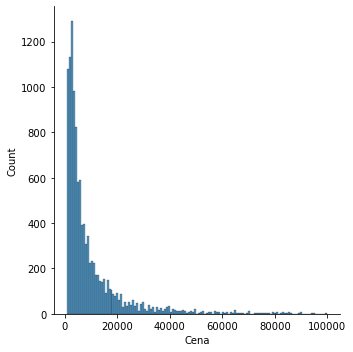

In [1570]:
sns.displot(data['Cena'])

In [1574]:
data

,Marka,Model,Godiste,Kilometraza,Karoserija,Gorivo,Kubikaza,Snaga,Cena,Godina
0,Alfa Romeo,75,1989,27000,Limuzina,Benzin,2.0,148,1500,2021
1,Alfa Romeo,145,1996,188754,Hečbek,Benzin,2.5,250,1400,2021
6,Alfa Romeo,147,2007,196000,Hečbek,Dizel,1.9,120,2499,2021
7,Alfa Romeo,147,2004,151000,Hečbek,Dizel,1.9,116,1990,2021
8,Alfa Romeo,147,2008,176000,Hečbek,Benzin + Gas (TNG),1.6,105,2690,2021
...,...,...,...,...,...,...,...,...,...,...
13311,Škoda,Yeti,2009,135950,Džip/SUV,Benzin,1.8,160,6499,2021
13312,Škoda,Yeti,2012,141000,Džip/SUV,Dizel,2.0,110,8500,2021
13313,Škoda,Yeti,2014,216000,Džip/SUV,Dizel,2.0,110,8500,2021
13314,Škoda,Yeti,2011,289000,Džip/SUV,Dizel,2.0,110,6300,2021


In [1572]:
data['Godina'] = '2021'

In [1573]:
data.to_csv('autoPol2021.csv', header=True, index=False)